<a href="https://colab.research.google.com/github/hkabbay/keras-practice/blob/main/tf_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
x = tf.ones(shape=(2,1))
print(x)
print(tf.zeros(shape=(1,3)))

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)
tf.Tensor([[0. 0. 0.]], shape=(1, 3), dtype=float32)


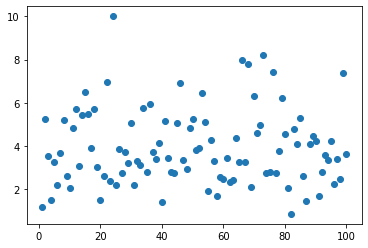

In [46]:
# Generate Random Normal distribution data
x = tf.random.normal(shape=(100,1), mean=0, stddev=1)
x_1 = tf.random.gamma(shape=(100,1), alpha=4)
# print(x_1)
plt.scatter(range(1,101),x_1);

In [50]:
# Difference between numpy and tensor
import numpy as np
x = np.ones(shape=(2,3))
x[0,0] = 0
x

array([[0., 1., 1.],
       [1., 1., 1.]])

In [51]:
x = tf.ones(shape=(2,3))
print(x)
x[0,0]=0
# Error with item assignment 

tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]], shape=(2, 3), dtype=float32)


TypeError: ignored

In [57]:
# Use tensorflow variables for item assignments
v = tf.Variable(initial_value=tf.random.normal(shape=(3,1)))
print(v)
# Update a single value
v[1,0].assign(2)
print(v)
# Update all values

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[1.229616  ],
       [0.44555384],
       [0.28393316]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[1.229616  ],
       [2.        ],
       [0.28393316]], dtype=float32)>


In [62]:
# Add and sub functions for += and -= ops
v.assign_add(tf.ones((3,1)))
# v.assign_add(tf.ones((4,1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.2296162],
       [4.       ],
       [2.2839332]], dtype=float32)>

In [65]:
# More math operations
i = tf.abs(tf.random.normal(shape=(2,3)))
print(i)
j = tf.square(i)
print(j)
k = tf.sqrt(i)
print(k)
l = j + k
print(l)
m = tf.matmul(i, tf.transpose(j))
print(m)

tf.Tensor(
[[0.5726206  0.37993792 0.2302799 ]
 [0.6871037  0.62444746 0.08586454]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[0.32789433 0.14435282 0.05302883]
 [0.4721115  0.38993463 0.00737272]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[0.75671697 0.61639106 0.47987488]
 [0.8289172  0.7902199  0.29302654]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[1.0846113  0.76074386 0.53290373]
 [1.3010287  1.1801546  0.30039924]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[0.25481564 0.42018947]
 [0.31999144 0.5685163 ]], shape=(2, 2), dtype=float32)


In [80]:
from numpy.lib.function_base import gradient
# GradientTape - what NumPy is missing?
input_var = tf.Variable(initial_value=2.)
with tf.GradientTape() as tape:
  result = tf.sin(input_var)
gradient = tape.gradient(result, input_var)
# similar to tape_gradient(loss, weights)
print(gradient)

tf.Tensor(-0.41614684, shape=(), dtype=float32)


In [88]:
# Example of 2nd order gradient 1/2*g*t^2
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
  with tf.GradientTape() as inner_tape:
    position = 4.9 * time ** 2
  speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)
print(acceleration)

tf.Tensor(9.8, shape=(), dtype=float32)


In [90]:
# Linear classifier from scratch
n_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean = [0, 3],
    cov = [[1, 0.5], [0.5, 1]],
    size = n_samples_per_class
)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5], [0.5, 1]],
    size = n_samples_per_class
)

In [107]:
# Stack both samples into an array shape(2000, 2)
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
# Generate target lables
targets = np.vstack((np.zeros((n_samples_per_class, 1), dtype="float32"),
                     np.ones((n_samples_per_class, 1), dtype="float32")))
# inputs.shape, targets.
inputs, targets

(array([[ 0.29250792,  4.0266724 ],
        [-1.2940099 ,  1.313487  ],
        [ 0.04452994,  3.4677322 ],
        ...,
        [ 1.7744771 , -0.00471412],
        [ 2.0502746 , -0.40315935],
        [ 3.7504787 , -1.1684644 ]], dtype=float32), array([[0.],
        [0.],
        [0.],
        ...,
        [1.],
        [1.],
        [1.]], dtype=float32))

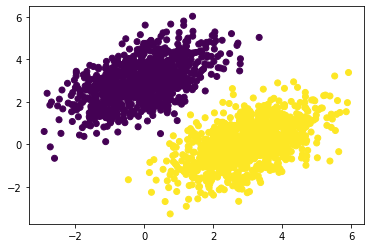

In [93]:
# Plot
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[: , 1], c=targets[:, 0])
plt.show()

In [108]:
# Create lineare classifier variables
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [109]:
def model(inputs):
  return tf.matmul(inputs, W) + b

In [110]:
# mean squared loss function
def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_losses)

In [111]:
learning_rate = 0.1
def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(predictions, targets)
  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
  W.assign_sub(grad_loss_wrt_W * learning_rate)
  b.assign_sub(grad_loss_wrt_b * learning_rate)
  return loss

In [113]:
# batch training loop
for step in range(40):
  loss = training_step(inputs, targets)
  # print loss upto 4-digit precision
  print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 5.4587
Loss at step 1: 0.4561
Loss at step 2: 0.1755
Loss at step 3: 0.1375
Loss at step 4: 0.1251
Loss at step 5: 0.1159
Loss at step 6: 0.1079
Loss at step 7: 0.1005
Loss at step 8: 0.0938
Loss at step 9: 0.0877
Loss at step 10: 0.0821
Loss at step 11: 0.0770
Loss at step 12: 0.0723
Loss at step 13: 0.0681
Loss at step 14: 0.0642
Loss at step 15: 0.0607
Loss at step 16: 0.0574
Loss at step 17: 0.0545
Loss at step 18: 0.0518
Loss at step 19: 0.0494
Loss at step 20: 0.0471
Loss at step 21: 0.0451
Loss at step 22: 0.0432
Loss at step 23: 0.0415
Loss at step 24: 0.0400
Loss at step 25: 0.0385
Loss at step 26: 0.0372
Loss at step 27: 0.0361
Loss at step 28: 0.0350
Loss at step 29: 0.0340
Loss at step 30: 0.0331
Loss at step 31: 0.0323
Loss at step 32: 0.0315
Loss at step 33: 0.0308
Loss at step 34: 0.0302
Loss at step 35: 0.0297
Loss at step 36: 0.0291
Loss at step 37: 0.0287
Loss at step 38: 0.0282
Loss at step 39: 0.0278


<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[ 0.18116832],
       [-0.11931796]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.38613155], dtype=float32)>


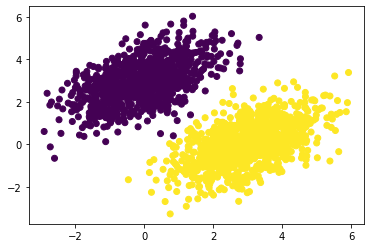

In [118]:
# Predict and plot
# Generate target with final weights and biases
print(W)
print(b)
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()  

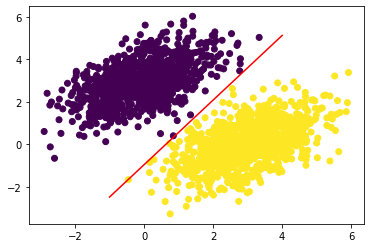

In [117]:
# Plot separator
# genrate x between -1 and 4
x = np.linspace(-1, 4, 100)  
# y = mx + b format         
# generate y's for all x's                               
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]    
# Draw a line                        
plt.plot(x, y, "-r")                                                 
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5) 